In [48]:
import pandas as pd
import string
import numpy as np
from collections import Counter, OrderedDict
import matplotlib.pyplot as plt
import copy
import requests as r
import seaborn as sns
%matplotlib inline

In [49]:
def load_data(url):
    string_punctuation = '!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~‘êàé—’”“'
    url = url
    data = r.get(url)
    f = data.text
    print('File downloaded')
    remove_bom = f.replace('\ufeff', '###')
    comma_delimit = remove_bom.replace('\n', ',').strip().lower().replace('\r', '').split(',') 
    clean_text = [each for each in comma_delimit if (str.rstrip(each) != '') or\
                  (str.rstrip(each) not in string_punctuation)]
    return pd.DataFrame({'text': clean_text})

def clean(s):
    '''
    Remove punctuation, numeric values and all extra spaces from string. 
    '''
    string_punctuation = '!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~‘êàé—’”“'
    # remove punctuation
    no_punc = s.translate(str.maketrans('', '', string_punctuation))
    # remove num
    no_num = ''.join([each for each in no_punc if not each.isdigit()])
    # remove extra spaces
    return ' '.join(no_num.split())

def count_alpha(x):
    return Counter(x)

def count(s):
    count_a = s.count('a') 
    count_b = s.count('b')
    count_c = s.count('c')
    count_d = s.count('d')
    count_e = s.count('e')
    count_f = s.count('f')
    count_g = s.count('g')
    count_h = s.count('h')
    count_i = s.count('i')
    count_j = s.count('j')
    count_k = s.count('k')
    count_l = s.count('l')
    count_m = s.count('m')
    count_n = s.count('n')
    count_o = s.count('o')
    count_p = s.count('p')
    count_q = s.count('q')
    count_r = s.count('r')
    count_s = s.count('s')
    count_t = s.count('t')
    count_u = s.count('u')
    count_v = s.count('v')
    count_w = s.count('w')
    count_x = s.count('x')
    count_y = s.count('y')
    count_z = s.count('z')
    count_space = s.count(' ')
    
    return {'a': count_a, 'b': count_b, 'c': count_c, 'd': count_d, 'e': count_e,
            'f': count_f, 'g': count_g, 'h': count_h, 'i': count_i, 'j': count_j,
            'k': count_k, 'l': count_l, 'm': count_m, 'n': count_n, 'o': count_o,
            'p': count_p, 'q': count_q, 'r': count_r, 's': count_s, 't': count_t,
            'u': count_u, 'v': count_v, 'w': count_w, 'x': count_x, 'y': count_y,
            'z': count_z, 'space': count_space}

def markov(s):
    return markov_pred_dict[s]

def markov_sampler(char_init, n_iter, markov_dict):
    char_now = char_init
    markov_str = []
    n_iter = n_iter
    for i in range(n_iter):
        char_now = markov(char_now)
        markov_str.append(char_now)
    return ''.join(markov_str)

def generate_kgram(s, n):
    return Counter([s[i:i+n] for i in range(0, len(s), 1)])

def agg_dict(df,col):
    dict_var= {}
    for d in [dict(each) for each in df[col].tolist()]:
        for k in d.keys():
            dict_var[k] = dict_var.get(k, 0) + d[k]
    return dict_var

def graph(x, y, data, ylabel, xlabel, title):
    sns.set(rc={'figure.figsize':(15,5)})
    sns.barplot(x=x, y=y, data=data)
    plt.ylabel(ylabel, fontsize=16)
    plt.xlabel(xlabel, fontsize=16)
    plt.ylim(0, 0.180, 0.025)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.title(title, fontsize=17)
    return plt.show()

In [50]:
new_col_list = ['first_pos', ' ', 'a', 'b', 'c',
                'd', 'e', 'f', 'g', 'h', 'i',
                'j', 'k', 'l', 'm', 'n', 'o',
                'p', 'q', 'r', 's', 't', 'u',
                'v', 'w', 'x', 'y', 'z']

idx_list = ['space', 'a', 'b', 'c', 
            'd', 'e', 'f', 'g', 'h', 
            'i', 'j', 'k', 'l', 'm', 
            'n', 'o', 'p', 'q', 'r', 
            's', 't', 'u', 'v', 'w', 
            'x', 'y', 'z']

In [51]:
df = load_data(url='https://dev.gutenberg.org/files/1342/1342-0.txt')
df.shape

File downloaded


(20805, 1)

In [52]:
df_clean = copy.deepcopy(df)
df_clean.loc[:, 'clean_string'] = df_clean['text'].apply(clean)
df_clean.replace('', np.nan, inplace=True)
df_clean.describe()

,text,clean_string
count,20805,20782
unique,18817,18197
top,and,and
freq,177,191


In [53]:
df_clean = df_clean[~df_clean['clean_string'].isna()]
df_clean.describe()

,text,clean_string
count,20782,20782
unique,18810,18197
top,and,and
freq,177,191


In [71]:
df_clean.loc[:, 'clean_string_count'] = df_clean['clean_string'].apply(count_alpha)
df_clean.loc[:, 'clean_string_count_py'] = df_clean['clean_string'].apply(count)
final_dist_py = agg_dict(df = df_clean, col = 'clean_string_count')
final_dist = agg_dict(df = df_clean, col = 'clean_string_count_py')
final_dist

{'a': 42759,
 'b': 9364,
 'c': 14127,
 'd': 22854,
 'e': 71265,
 'f': 12385,
 'g': 10445,
 'h': 34650,
 'i': 38958,
 'j': 969,
 'k': 3343,
 'l': 22073,
 'm': 15126,
 'n': 38730,
 'o': 41385,
 'p': 8743,
 'q': 638,
 'r': 33537,
 's': 33873,
 't': 48229,
 'u': 15509,
 'v': 5845,
 'w': 12578,
 'x': 867,
 'y': 13033,
 'z': 938,
 'space': 103750}

In [55]:
df_freq = pd.DataFrame(final_dist.items(), columns=['letter', 'count'])
df_freq['freq'] = df_freq['count'] / df_freq['count'].sum()
df_freq.at[3, 'letter'] = 'space'
df_freq.sort_values(by='count', ascending=False, inplace=True)
df_freq.reset_index(drop=True, inplace=True)
df_freq['rank'] = df_freq.index + 1
df_freq

,letter,count,freq,rank
0,space,103750,0.158162,1
1,e,71265,0.108640,2
2,t,48229,0.073523,3
3,a,42759,0.065184,4
4,o,41385,0.063089,5
5,i,38958,0.059390,6
6,n,38730,0.059042,7
7,h,34650,0.052822,8
8,s,33873,0.051638,9
9,r,33537,0.051126,10


In [56]:
df_freq_py = pd.DataFrame(final_dist_py.items(), columns=['letter', 'count'])
df_freq_py['freq'] = df_freq_py['count'] / df_freq_py['count'].sum()
df_freq_py.at[3, 'letter'] = 'space'
df_freq_py.sort_values(by='count', ascending=False, inplace=True)
df_freq_py.reset_index(drop=True, inplace=True)
df_freq_py['rank'] = df_freq_py.index + 1
df_freq_py

,letter,count,freq,rank
0,space,103750,0.158162,1
1,e,71265,0.108640,2
2,t,48229,0.073523,3
3,a,42759,0.065184,4
4,o,41385,0.063089,5
5,i,38958,0.059390,6
6,n,38730,0.059042,7
7,h,34650,0.052822,8
8,s,33873,0.051638,9
9,r,33537,0.051126,10


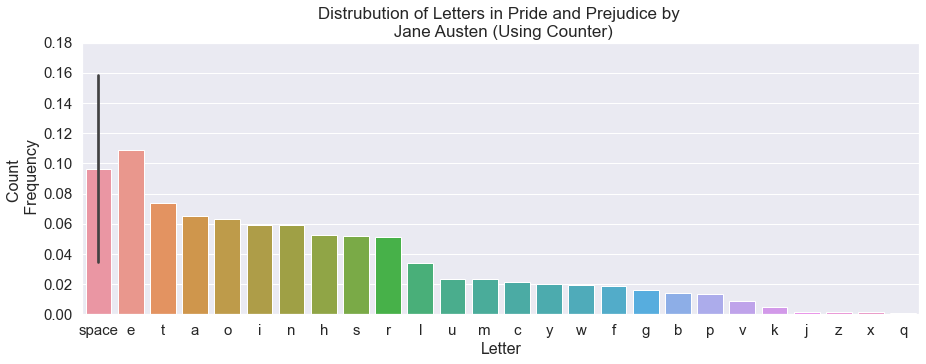

In [57]:
graph(x='letter', 
      y='freq', 
      data=df_freq, 
      ylabel='Count \n Frequency', 
      xlabel='Letter', 
      title='Distrubution of Letters in Pride and Prejudice by \n Jane Austen (Using Counter)')

In [58]:
df_clean.loc[:, 'kgrams'] = df_clean['clean_string'].apply(generate_kgram, args=[2])
df_clean.head(10)

,text,clean_string,clean_string_count,clean_string_count_py,kgrams
1,the project gutenberg ebook of pride and preju...,the project gutenberg ebook of pride and preju...,"{'t': 3, 'h': 1, 'e': 8, ' ': 7, 'p': 3, 'r': ...","{'a': 1, 'b': 2, 'c': 2, 'd': 3, 'e': 8, 'f': ...","{'th': 1, 'he': 1, 'e ': 2, ' p': 3, 'pr': 3, ..."
2,by jane austen,by jane austen,"{'b': 1, 'y': 1, ' ': 2, 'j': 1, 'a': 2, 'n': ...","{'a': 2, 'b': 1, 'c': 0, 'd': 0, 'e': 2, 'f': ...","{'by': 1, 'y ': 1, ' j': 1, 'ja': 1, 'an': 1, ..."
3,this ebook is for the use of anyone anywhere a...,this ebook is for the use of anyone anywhere a...,"{'t': 5, 'h': 4, 'i': 3, 's': 4, ' ': 13, 'e':...","{'a': 4, 'b': 1, 'c': 1, 'd': 1, 'e': 6, 'f': ...","{'th': 3, 'hi': 1, 'is': 2, 's ': 2, ' e': 1, ..."
4,almost no restrictions whatsoever. you may co...,almost no restrictions whatsoever you may copy it,"{'a': 3, 'l': 1, 'm': 2, 'o': 6, 's': 4, 't': ...","{'a': 3, 'b': 0, 'c': 2, 'd': 0, 'e': 3, 'f': ...","{'al': 1, 'lm': 1, 'mo': 1, 'os': 1, 'st': 2, ..."
5,give it away or,give it away or,"{'g': 1, 'i': 2, 'v': 1, 'e': 1, ' ': 3, 't': ...","{'a': 2, 'b': 0, 'c': 0, 'd': 0, 'e': 1, 'f': ...","{'gi': 1, 'iv': 1, 've': 1, 'e ': 1, ' i': 1, ..."
6,re-use it under the terms of the project guten...,reuse it under the terms of the project gutenb...,"{'r': 5, 'e': 12, 'u': 4, 's': 3, ' ': 10, 'i'...","{'a': 0, 'b': 1, 'c': 3, 'd': 3, 'e': 12, 'f':...","{'re': 1, 'eu': 1, 'us': 1, 'se': 2, 'e ': 4, ..."
7,with this ebook or online at www.gutenberg.org,with this ebook or online at wwwgutenbergorg,"{'w': 4, 'i': 3, 't': 4, 'h': 2, ' ': 6, 's': ...","{'a': 1, 'b': 2, 'c': 0, 'd': 0, 'e': 4, 'f': ...","{'wi': 1, 'it': 1, 'th': 2, 'h ': 1, ' t': 1, ..."
8,title: pride and prejudice,title pride and prejudice,"{'t': 2, 'i': 3, 'l': 1, 'e': 4, ' ': 3, 'p': ...","{'a': 1, 'b': 0, 'c': 1, 'd': 3, 'e': 4, 'f': ...","{'ti': 1, 'it': 1, 'tl': 1, 'le': 1, 'e ': 2, ..."
9,author: jane austen,author jane austen,"{'a': 3, 'u': 2, 't': 2, 'h': 1, 'o': 1, 'r': ...","{'a': 3, 'b': 0, 'c': 0, 'd': 0, 'e': 2, 'f': ...","{'au': 2, 'ut': 1, 'th': 1, 'ho': 1, 'or': 1, ..."
10,release date: august 26,release date august,"{'r': 1, 'e': 4, 'l': 1, 'a': 3, 's': 2, ' ': ...","{'a': 3, 'b': 0, 'c': 0, 'd': 1, 'e': 4, 'f': ...","{'re': 1, 'el': 1, 'le': 1, 'ea': 1, 'as': 1, ..."


In [69]:
kgram_dist = agg_dict(df = df_clean, col = 'kgrams')
df_kgram = pd.DataFrame(kgram_dist.items(), columns=['kgram', 'count'])
df_kgram['kgram_len'] = df_kgram['kgram'].str.split(' ').str.len()

two_grams = df_kgram[df_kgram.kgram_len == 1].reset_index(drop=True)
two_grams = copy.deepcopy(two_grams)
two_grams.loc[:, 'first_pos'] = two_grams['kgram'].str[0]
two_grams.loc[:, 'second_pos'] = two_grams['kgram'].str[1]
df = two_grams[['kgram', 'count', 'first_pos', 'second_pos']]
df_kgram

,kgram,count,kgram_len
0,th,14098,1
1,he,15044,1
2,e,18631,2
3,p,2766,2
4,pr,1494,1
...,...,...,...
535,kc,1,1
536,ii,2,1
537,wp,1,1
538,wb,2,1


In [70]:
df_trans = df.pivot_table(index=['first_pos'], columns='second_pos', values='count')
df_trans['first_pos'] = df_trans.index
df_trans.reset_index(drop=True, inplace=True)
df_reorder = df_trans.reindex(columns=new_col_list)
df_reorder.head()

second_pos,first_pos,,a,b,c,d,e,f,g,h,...,q,r,s,t,u,v,w,x,y,z
0,a,NaN,7.0,1562.0,1160.0,2447.0,8.0,473.0,899.0,6.0,...,NaN,4270.0,4903.0,5818.0,517.0,1371.0,348.0,11.0,1229.0,23.0
1,b,NaN,292.0,7.0,NaN,1.0,4290.0,NaN,NaN,7.0,...,NaN,325.0,156.0,111.0,1144.0,1.0,NaN,NaN,692.0,NaN
2,c,NaN,1441.0,1.0,344.0,3.0,2575.0,NaN,NaN,2371.0,...,100.0,331.0,7.0,1440.0,375.0,NaN,NaN,NaN,509.0,NaN
3,d,NaN,1114.0,8.0,1.0,215.0,2623.0,25.0,124.0,12.0,...,1.0,244.0,428.0,21.0,240.0,100.0,22.0,NaN,407.0,NaN
4,e,NaN,3165.0,78.0,1802.0,5544.0,1960.0,709.0,333.0,154.0,...,198.0,11652.0,3739.0,2624.0,23.0,1430.0,389.0,745.0,1171.0,NaN


In [61]:
df_reorder['idxmax'] = df_reorder.iloc[:, 1:-1].idxmax(axis=1)
markov_pred_dict = dict(zip(df_reorder['first_pos'].tolist(), df_reorder['idxmax'].tolist()))
markov_pred_dict

{'a': 'n',
 'b': 'e',
 'c': 'o',
 'd': 'e',
 'e': 'r',
 'f': 'o',
 'g': 'h',
 'h': 'e',
 'i': 'n',
 'j': 'e',
 'k': 'e',
 'l': 'e',
 'm': 'e',
 'n': 'd',
 'o': 'u',
 'p': 'e',
 'q': 'u',
 'r': 'e',
 's': 'e',
 't': 'h',
 'u': 'r',
 'v': 'e',
 'w': 'a',
 'x': 'p',
 'y': 'o',
 'z': 'a'}

In [62]:
markov_string = markov_sampler(char_init='t', n_iter=3000, markov_dict=markov_pred_dict)
markov_string

'hererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererer

In [63]:
len(markov_string)

3000

In [64]:
df_kgram = copy.deepcopy(df_kgram)
df_kgram.loc[:, 'first_pos'] = df_kgram['kgram'].str[0]
df_kgram.loc[:, 'second_pos'] = df_kgram['kgram'].str[1]
df_k = df_kgram[['kgram', 'count', 'first_pos', 'second_pos']]
df_ktrans = df_k.pivot_table(index=['first_pos'], columns='second_pos', values='count')
df_ktrans['first_pos'] = df_ktrans.index
df_ktrans.reset_index(drop=True, inplace=True)
df_ktrans.fillna(0, inplace=True) 

In [65]:
df_ktrans = df_ktrans.reindex(columns=new_col_list).fillna(0)
df_ktrans.rename(columns={' ': 'space'}, inplace=True)
df_ktrans.loc[0, 'first_pos'] = 'space'
df_ktrans['total'] = df_ktrans.iloc[:, 0:].sum(axis=1)
df_ktrans.head()

second_pos,first_pos,space,a,b,c,d,e,f,g,h,...,r,s,t,u,v,w,x,y,z,total
0,space,0.0,10684.0,5187.0,4012.0,3368.0,2701.0,3645.0,1675.0,9233.0,...,2049.0,7289.0,13894.0,894.0,791.0,7469.0,0.0,1915.0,1.0,103750.0
1,a,1981.0,7.0,1562.0,1160.0,2447.0,8.0,473.0,899.0,6.0,...,4270.0,4903.0,5818.0,517.0,1371.0,348.0,11.0,1229.0,23.0,42456.0
2,b,13.0,292.0,7.0,0.0,1.0,4290.0,0.0,0.0,7.0,...,325.0,156.0,111.0,1144.0,1.0,0.0,0.0,692.0,0.0,9363.0
3,c,78.0,1441.0,1.0,344.0,3.0,2575.0,0.0,0.0,2371.0,...,331.0,7.0,1440.0,375.0,0.0,0.0,0.0,509.0,0.0,14101.0
4,d,11770.0,1114.0,8.0,1.0,215.0,2623.0,25.0,124.0,12.0,...,244.0,428.0,21.0,240.0,100.0,22.0,0.0,407.0,0.0,20646.0


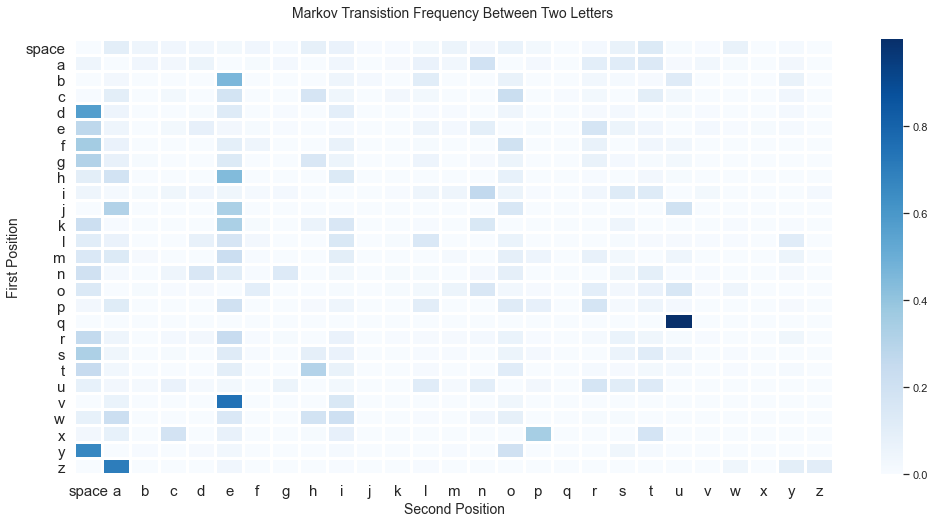

In [66]:
df_ktrans_freq = df_ktrans.iloc[:, 1:].div(df_ktrans['total'] , axis=0)
df_ktrans_freq_2 = df_ktrans_freq.iloc[:, 0:27]
df_ktrans_freq_2['idx'] = idx_list
df_ktrans_freq_2.set_index('idx', inplace=True)

sns.set(rc={'figure.figsize':(17,8)})
sns.heatmap(df_ktrans_freq_2.iloc[:, 0:27], linewidths=2, yticklabels=1, cmap='Blues')
plt.ylabel('First Position', fontsize=14)
plt.xlabel('Second Position', fontsize=14)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.title('Markov Transistion Frequency Between Two Letters \n', fontsize=14)
plt.show()